In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ast

In [2]:
PROJECT_DIR = "."
DATASET_DIR = os.path.join(PROJECT_DIR,"dataset")

# ChexPert

In [3]:
chexpert_path = os.path.join(DATASET_DIR,"CheXpert/train_cheXbert.csv")

In [4]:
chexpert = pd.read_csv(chexpert_path)
chexpert

,Path,Sex,Age,Frontal/Lateral,AP/PA,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,No Finding
0,CheXpert-v1.0/train/patient00001/study1/view1_...,Female,68,Frontal,AP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0
1,CheXpert-v1.0/train/patient00002/study2/view1_...,Female,87,Frontal,AP,NaN,1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,NaN
2,CheXpert-v1.0/train/patient00002/study1/view1_...,Female,83,Frontal,AP,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,CheXpert-v1.0/train/patient00002/study1/view2_...,Female,83,Lateral,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,CheXpert-v1.0/train/patient00003/study1/view1_...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223409,CheXpert-v1.0/train/patient64537/study2/view1_...,Male,59,Frontal,AP,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,0.0,1.0,NaN,NaN,NaN,NaN
223410,CheXpert-v1.0/train/patient64537/study1/view1_...,Male,59,Frontal,AP,NaN,NaN,1.0,NaN,NaN,NaN,0.0,-1.0,NaN,1.0,NaN,NaN,NaN,NaN
223411,CheXpert-v1.0/train/patient64538/study1/view1_...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223412,CheXpert-v1.0/train/patient64539/study1/view1_...,Female,0,Frontal,AP,NaN,1.0,1.0,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [5]:
chexpert.columns

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices', 'No Finding'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Density'>

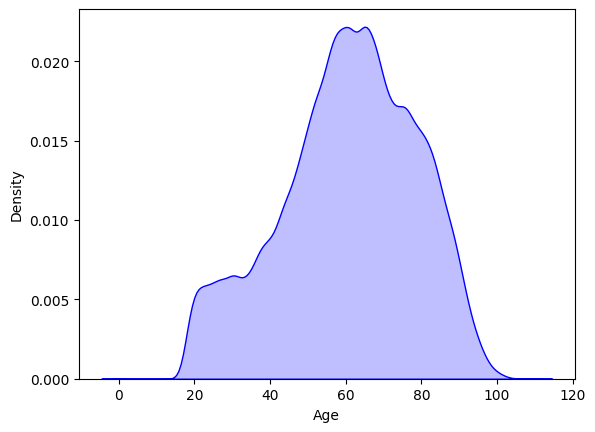

In [6]:
sns.kdeplot(chexpert,x='Age',fill=True, color='blue')

In [7]:
chexpert['Sex'].value_counts()

Sex
Male       132636
Female      90777
Unknown         1
Name: count, dtype: int64

In [10]:
chexpert['Pneumonia'].value_counts()

Pneumonia
-1.0    19386
 1.0     4856
 0.0     3314
Name: count, dtype: int64

In [11]:
chexpert['Pneumonia'].notna()

0         False
1         False
2         False
3         False
4         False
          ...  
223409    False
223410     True
223411    False
223412     True
223413    False
Name: Pneumonia, Length: 223414, dtype: bool

In [12]:
chexpert_pneu = chexpert[chexpert['Pneumonia']==1]

In [13]:
chexpert_pneu['Pneumonia'].value_counts()

Pneumonia
1.0    4856
Name: count, dtype: int64

# PadChest

In [14]:
padchest_path = os.path.join(DATASET_DIR,r"PadChest\labels_csv\PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv")

In [48]:
padchest = pd.read_csv(padchest_path)
padchest

,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,...,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS
0,0,20536686640136348236148679891455886468_k6ga29.png,0,20140915,20536686640136348236148679891455886468,839860488694292331637988235681460987,1930.0,F,POSTEROANTERIOR,PA,...,10.0,-1.42,4765777,sin hallazg patolog edad pacient .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[]
1,1,135803415504923515076821959678074435083_fzis7d...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,LATERAL,L,...,25.0,NaN,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378']
2,2,135803415504923515076821959678074435083_fzis7b...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,POSTEROANTERIOR,PA,...,10.0,NaN,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378']
3,3,113855343774216031107737439268243531979_3k951l...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,POSTEROANTERIOR,PA,...,8.0,NaN,4955977,. . siluet cardi mediastin dentr normal . cam...,Physician,['chronic changes'],"['loc cardiac', 'loc mediastinum', 'loc costop...","[['chronic changes'], ['chronic changes'], ['n...",['C0742362'],['C1522601' 'C0025066' 'C0230151']
4,4,113855343774216031107737439268243531979_3k951n...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,LATERAL,L,...,20.0,NaN,4955977,. . siluet cardi mediastin dentr normal . cam...,Physician,['chronic changes'],"['loc cardiac', 'loc mediastinum', 'loc costop...","[['chronic changes'], ['chronic changes'], ['n...",['C0742362'],['C1522601' 'C0025066' 'C0230151']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160856,160856,1284011361929414522814654121696751542351444145...,49,20110321,1284011361929414522814654121696751542351444145...,112930952416074060371371014599496493673,1948.0,M,POSTEROANTERIOR,PA,...,10.0,-0.69,4018689,import sign radiolog epoc . pinzamient ambos ...,RNN_model,"['COPD signs', 'costophrenic angle blunting']",['loc costophrenic angle'],"['COPD signs', 'costophrenic angle blunting', ...",['C0024117' 'C0742855'],['C0230151']
160857,160857,1284011361929414522094646571696751542351444145...,49,20090609,1284011361929414522094646571696751542351444145...,282743729971423358706056731890510600934,1944.0,F,POSTEROANTERIOR,PA,...,10.0,-0.85,3639865,dentr normal .,RNN_model,['normal'],[],['normal'],[],[]
160858,160858,1284011361929414522086390631696751542351444145...,49,20110415,1284011361929414522086390631696751542351444145...,52648743308541843883453242716226652771,1965.0,M,NaN,AP_horizontal,...,NaN,784.00,4035503,tub endotraqueal sond nasogastr situacion cor...,RNN_model,"['NSG tube', ' endotracheal tube']",['loc tracheal'],"['NSG tube', ' endotracheal tube', 'loc trache...",['C0336630'],['C0040578']
160859,160859,1284011361929414522084108901696751542351444145...,49,20101214,1284011361929414522084108901696751542351444145...,228646130593152933811948996634154201216,1943.0,F,POSTEROANTERIOR,PA,...,10.0,-1.00,3958189,dentr normal .,RNN_model,['normal'],[],['normal'],[],[]


In [49]:
padchest.columns

Index(['Unnamed: 0', 'ImageID', 'ImageDir', 'StudyDate_DICOM', 'StudyID',
       'PatientID', 'PatientBirth', 'PatientSex_DICOM', 'ViewPosition_DICOM',
       'Projection', 'MethodProjection', 'Pediatric', 'Modality_DICOM',
       'Manufacturer_DICOM', 'PhotometricInterpretation_DICOM',
       'PixelRepresentation_DICOM', 'PixelAspectRatio_DICOM',
       'SpatialResolution_DICOM', 'BitsStored_DICOM', 'WindowCenter_DICOM',
       'WindowWidth_DICOM', 'Rows_DICOM', 'Columns_DICOM',
       'XRayTubeCurrent_DICOM', 'Exposure_DICOM', 'ExposureInuAs_DICOM',
       'ExposureTime', 'RelativeXRayExposure_DICOM', 'ReportID', 'Report',
       'MethodLabel', 'Labels', 'Localizations',
       'LabelsLocalizationsBySentence', 'labelCUIS', 'LocalizationsCUIS'],
      dtype='object')

In [50]:
padchest['Age'] = padchest['StudyDate_DICOM'].astype(str).str.slice(0, 4).astype(float) - padchest['PatientBirth']

In [51]:
'pneumonia' in ['chronic changes']

False

In [52]:
'pneumonia' in np.array(['a','b'])

False

In [53]:
def find_pneu_padchest(x):
    if x is np.nan:
        return False
    return 'pneumonia' in ast.literal_eval(x)

In [54]:
padchest['Labels'].iloc[0] is np.nan

False

In [55]:
padchest_pneu = padchest[padchest['Labels'].apply(find_pneu_padchest)]

In [56]:
padchest_pneu


,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,...,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS,Age
42,42,14968019924555248865694512726537711769_3r162a.png,0,20150622,14968019924555248865694512726537711769,32588016314042952172500681022764831222,1993.0,F,NaN,AP_horizontal,...,419.0,4943910,sin cambi signific respect estudi previ ayer ...,Physician,"['interstitial pattern', 'unchanged', 'pneumon...","['loc cardiac', 'loc diffuse bilateral', 'loc ...","[['interstitial pattern', 'pneumonia', 'loc di...",['C2073538' 'C0032285'],['C1522601' 'C0238767'],22.0
48,48,68031809687808465969241796432987316467_wir071.png,0,20160918,68031809687808465969241796432987316467,206034364315266209909106199297767779230,1958.0,F,NaN,AP_horizontal,...,737.0,5227087,are consolidacion parenquimat bilateral resp ...,Physician,"['consolidation', 'pneumonia']","['loc middle lung field', 'loc right', 'loc bi...","[['consolidation', 'pneumonia', 'loc middle lu...",['C0521530' 'C0032285'],['C0929434' 'C0444532' 'C0238767'],58.0
73,73,240901793831868002350241513124822033145_clgbhs...,0,20140407,240901793831868002350241513124822033145,27469857597493924763355022866351961988,1959.0,M,NaN,L,...,1575.0,4671607,sign enfisem pulmon con bull lsi . aument tra...,Physician,"['bronchovascular markings', 'emphysema', 'pne...","['loc left upper lobe', 'loc bronchi', 'loc bi...","[['bronchovascular markings', 'pneumonia', 'lo...",['C2073518' 'C0034067' 'C0032285' 'C0241982'],['C1261076' 'C0006255' 'C0238767'],55.0
74,74,240901793831868002350241513124822033145_bnzkfq...,0,20140407,240901793831868002350241513124822033145,27469857597493924763355022866351961988,1959.0,M,NaN,PA,...,186.0,4671607,sign enfisem pulmon con bull lsi . aument tra...,Physician,"['bronchovascular markings', 'emphysema', 'pne...","['loc left upper lobe', 'loc bronchi', 'loc bi...","[['bronchovascular markings', 'pneumonia', 'lo...",['C2073518' 'C0034067' 'C0032285' 'C0241982'],['C1261076' 'C0006255' 'C0238767'],55.0
101,101,303749711587233420279581812693876233202_comg8i...,0,20140827,303749711587233420279581812693876233202,159094138658868928674447347956484819685,1948.0,F,NaN,L,...,398.0,4756356,discret opac retrocardiac intersticioalveol c...,Physician,"['aortic elongation', 'alveolar pattern', 'ver...","['loc aortic', 'loc costophrenic angle', 'loc ...","[['aortic elongation', 'loc aortic'], ['alveol...",['C1332240' 'C4290224' 'C2073538' 'C0032285'],['C0003483' 'C0230151'],66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160719,160719,216840111366964012819207061112010320085442669_...,49,20101116,216840111366964012819207061112010320085442669,80024101269919016278149990714163513834,1921.0,M,NaN,AP,...,352.0,3942227,comp con estudi previ 20 octubr 2010 . resolu...,RNN_model,"['unchanged', 'pneumonia', 'calcified densities']","['loc right lower lobe', 'loc bilateral', 'loc...","['unchanged', 'normal', 'loc right lower lobe'...",['C0032285' 'C2203586'],['C1261075' 'C0238767' 'C1261077'],89.0
160774,160774,216840111366964012904401302362010327094749009_...,49,20101124,216840111366964012904401302362010327094749009,190892852814413319015036356489011842181,1980.0,M,NaN,PA,...,NaN,3946852,cuadr clinic descrit hallazg radiolog sugier ...,RNN_model,['pneumonia'],[],"['pneumonia', 'exclude']",['C0032285'],[],30.0
160788,160788,216840111366964012904401302362010327094749009_...,49,20101124,216840111366964012904401302362010327094749009,190892852814413319015036356489011842181,1980.0,M,NaN,L,...,NaN,3946852,cuadr clinic descrit hallazg radiolog sugier ...,RNN_model,['pneumonia'],[],"['pneumonia', 'exclude']",['C0032285'],[],30.0
160801,160801,216840111366964012904401302362010327094749009_...,49,20101124,216840111366964012904401302362010327094749009,190892852814413319015036356489011842181,1980.0,M,NaN,PA,...,NaN,3946852,c

In [23]:
padchest['StudyDate_DICOM'].astype(str).str.slice(0, 4).astype(float)

0         2014.0
1         2015.0
2         2015.0
3         2015.0
4         2015.0
           ...  
160856    2011.0
160857    2009.0
160858    2011.0
160859    2010.0
160860    2010.0
Name: StudyDate_DICOM, Length: 160861, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

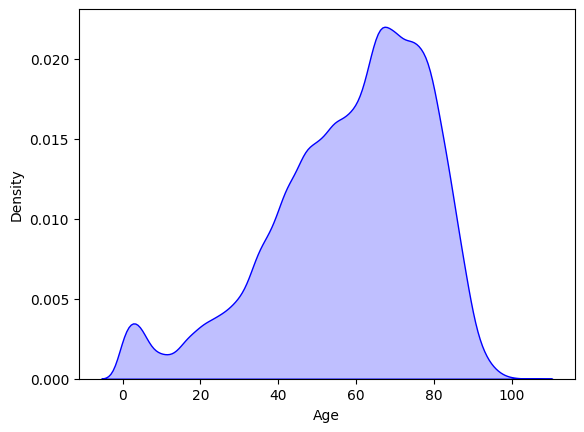

In [25]:
sns.kdeplot(padchest,x='Age',fill=True, color='blue')

<Axes: xlabel='PatientBirth', ylabel='Density'>

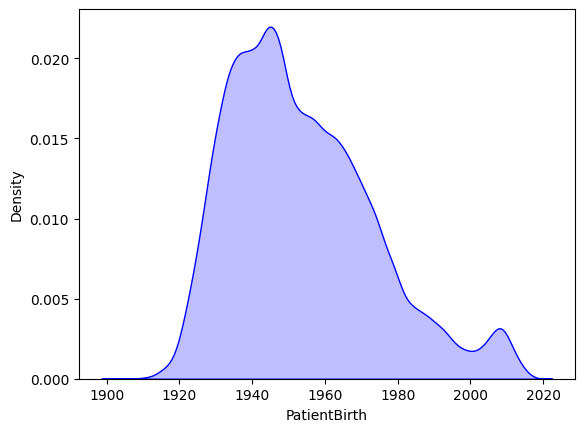

In [26]:
sns.kdeplot(padchest,x='PatientBirth',fill=True, color='blue')

In [27]:
padchest['PatientSex_DICOM'].value_counts()

PatientSex_DICOM
M    80920
F    79919
O       18
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

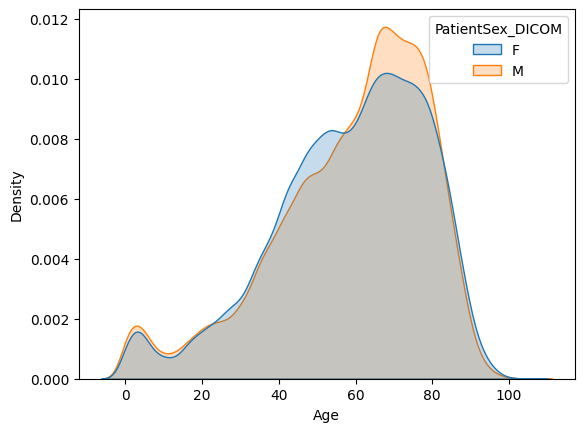

In [28]:
sns.kdeplot(padchest[padchest['PatientSex_DICOM']!='O'],x='Age',hue='PatientSex_DICOM',fill=True, color='blue')

# ChestXRay

In [29]:
nih_path = os.path.join(DATASET_DIR,r"ChestXray14/Data_Entry_2017.csv")

In [58]:
nih = pd.read_csv(nih_path)
nih

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,058Y,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,058Y,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,058Y,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,081Y,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,081Y,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,039Y,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,029Y,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,042Y,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,030Y,F,PA,2048,2500,0.168,0.168,NaN


In [59]:
def convert_age_to_years(age_str):
    if age_str.endswith('Y'):
        return float(age_str[:-1])
    elif age_str.endswith('M'):
        return float(age_str[:-1]) / 12
    elif age_str.endswith('D'):
        return float(age_str[:-1]) / 365
    else:
        return None

In [60]:
nih['Age'] = nih['Patient Age'].apply(convert_age_to_years)

In [61]:
def find_pneu_nih(x):
    if x is np.nan:
        return False
    return 'Pneumonia' in x.split('|')

In [62]:
nih_pneu = nih[nih['Finding Labels'].apply(find_pneu_nih)]

In [63]:
nih_pneu

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,Age
48,00000013_010.png,Effusion|Pneumonia|Pneumothorax,10,13,060Y,M,AP,3056,2544,0.139,0.139,NaN,60.0
126,00000032_012.png,Atelectasis|Consolidation|Edema|Pneumonia,12,32,055Y,F,AP,2500,2048,0.168,0.168,NaN,55.0
253,00000056_000.png,Nodule|Pneumonia,0,56,076Y,M,PA,2500,2048,0.168,0.168,NaN,76.0
276,00000061_012.png,Edema|Effusion|Infiltration|Pleural_Thickening...,12,61,077Y,M,AP,3056,2544,0.139,0.139,NaN,77.0
279,00000061_015.png,Pneumonia,15,61,077Y,M,AP,3056,2544,0.139,0.139,NaN,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111557,00030536_007.png,Atelectasis|Consolidation|Pneumonia,7,30536,056Y,F,AP,3056,2544,0.139,0.139,NaN,56.0
111627,00030570_001.png,Edema|Infiltration|Pneumonia,1,30570,029Y,F,AP,3056,2544,0.139,0.139,NaN,29.0
111767,00030621_002.png,Pneumonia,2,30621,022Y,F,AP,3056,2544,0.139,0.139,NaN,22.0
111845,00030637_016.png,Consolidation|Pneumonia,16,30637,048Y,M,AP,3056,2544,0.139,0.139,NaN,48.0


In [64]:
nih['Patient Age'].astype(str).str.slice(3,4).value_counts()

Patient Age
Y    112093
M        26
D         1
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

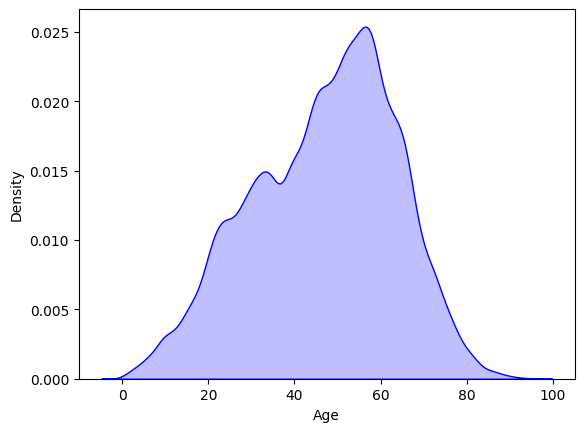

In [37]:
sns.kdeplot(nih[nih['Age']<120],x='Age',fill=True, color='blue')

<Axes: xlabel='Age', ylabel='Density'>

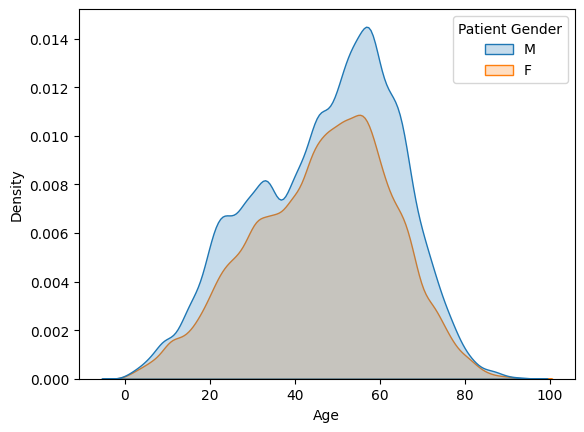

In [38]:
sns.kdeplot(nih[nih['Age']<120],x='Age',hue='Patient Gender',fill=True, color='blue')

# Combine

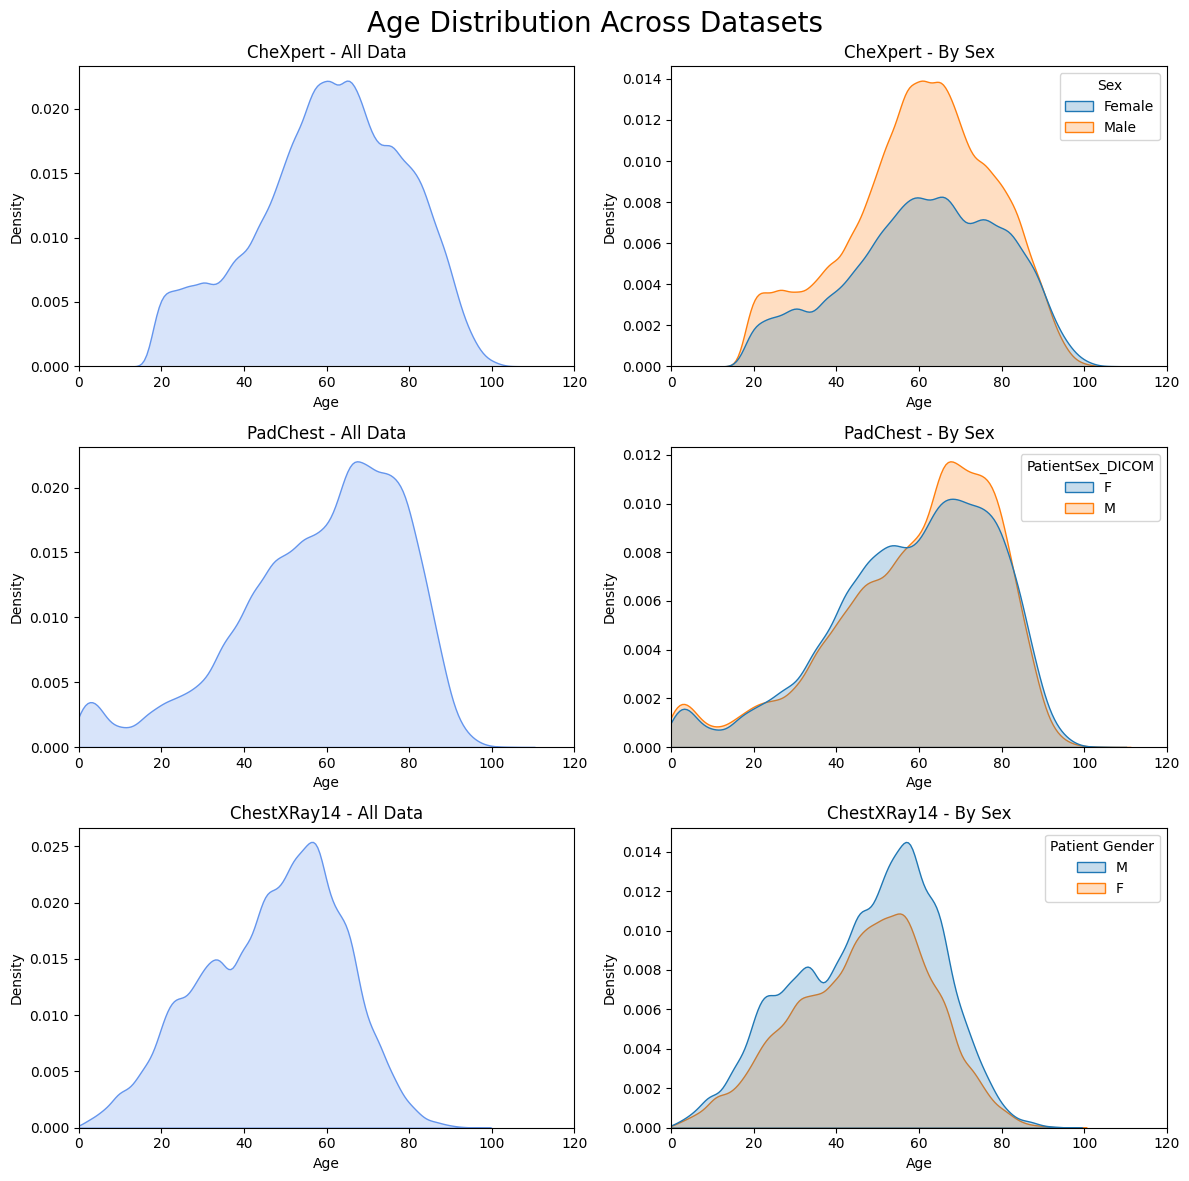

In [39]:
age_color = 'cornflowerblue'
age_min = 0
age_max = 120

plt.figure(figsize=(12,12))
plt.suptitle('Age Distribution Across Datasets',fontsize=20)

# CheXpert
plt.subplot(3,2,1)
sns.kdeplot(chexpert, x='Age', fill=True, color=age_color)
plt.title('CheXpert - All Data')
plt.xlim(age_min,age_max)

plt.subplot(3,2,2)
sns.kdeplot(chexpert[chexpert['Sex'] != 'Unknown'], x='Age', hue='Sex', fill=True)
plt.title('CheXpert - By Sex')
plt.xlim(age_min,age_max)

# PadChest
plt.subplot(3,2,3)
sns.kdeplot(padchest, x='Age', fill=True, color=age_color)
plt.title('PadChest - All Data')
plt.xlim(age_min,age_max)

plt.subplot(3,2,4)
sns.kdeplot(padchest[padchest['PatientSex_DICOM'] != 'O'], x='Age', hue='PatientSex_DICOM', fill=True)
plt.title('PadChest - By Sex')
plt.xlim(age_min,age_max)

# ChestXRay14
plt.subplot(3,2,5)
sns.kdeplot(nih[nih['Age'] < 120], x='Age', fill=True, color=age_color)
plt.title('ChestXRay14 - All Data')
plt.xlim(age_min,age_max)

plt.subplot(3,2,6)
sns.kdeplot(nih[nih['Age'] < 120], x='Age', hue='Patient Gender', fill=True)
plt.title('ChestXRay14 - By Sex')
plt.xlim(age_min,age_max)

plt.tight_layout()


plt.show()


In [45]:
padchest_pneu

,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,...,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS
42,42,14968019924555248865694512726537711769_3r162a.png,0,20150622,14968019924555248865694512726537711769,32588016314042952172500681022764831222,1993.0,F,NaN,AP_horizontal,...,NaN,419.0,4943910,sin cambi signific respect estudi previ ayer ...,Physician,"['interstitial pattern', 'unchanged', 'pneumon...","['loc cardiac', 'loc diffuse bilateral', 'loc ...","[['interstitial pattern', 'pneumonia', 'loc di...",['C2073538' 'C0032285'],['C1522601' 'C0238767']
48,48,68031809687808465969241796432987316467_wir071.png,0,20160918,68031809687808465969241796432987316467,206034364315266209909106199297767779230,1958.0,F,NaN,AP_horizontal,...,NaN,737.0,5227087,are consolidacion parenquimat bilateral resp ...,Physician,"['consolidation', 'pneumonia']","['loc middle lung field', 'loc right', 'loc bi...","[['consolidation', 'pneumonia', 'loc middle lu...",['C0521530' 'C0032285'],['C0929434' 'C0444532' 'C0238767']
73,73,240901793831868002350241513124822033145_clgbhs...,0,20140407,240901793831868002350241513124822033145,27469857597493924763355022866351961988,1959.0,M,NaN,L,...,NaN,1575.0,4671607,sign enfisem pulmon con bull lsi . aument tra...,Physician,"['bronchovascular markings', 'emphysema', 'pne...","['loc left upper lobe', 'loc bronchi', 'loc bi...","[['bronchovascular markings', 'pneumonia', 'lo...",['C2073518' 'C0034067' 'C0032285' 'C0241982'],['C1261076' 'C0006255' 'C0238767']
74,74,240901793831868002350241513124822033145_bnzkfq...,0,20140407,240901793831868002350241513124822033145,27469857597493924763355022866351961988,1959.0,M,NaN,PA,...,NaN,186.0,4671607,sign enfisem pulmon con bull lsi . aument tra...,Physician,"['bronchovascular markings', 'emphysema', 'pne...","['loc left upper lobe', 'loc bronchi', 'loc bi...","[['bronchovascular markings', 'pneumonia', 'lo...",['C2073518' 'C0034067' 'C0032285' 'C0241982'],['C1261076' 'C0006255' 'C0238767']
101,101,303749711587233420279581812693876233202_comg8i...,0,20140827,303749711587233420279581812693876233202,159094138658868928674447347956484819685,1948.0,F,NaN,L,...,0.0,398.0,4756356,discret opac retrocardiac intersticioalveol c...,Physician,"['aortic elongation', 'alveolar pattern', 'ver...","['loc aortic', 'loc costophrenic angle', 'loc ...","[['aortic elongation', 'loc aortic'], ['alveol...",['C1332240' 'C4290224' 'C2073538' 'C0032285'],['C0003483' 'C0230151']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160719,160719,216840111366964012819207061112010320085442669_...,49,20101116,216840111366964012819207061112010320085442669,80024101269919016278149990714163513834,1921.0,M,NaN,AP,...,NaN,352.0,3942227,comp con estudi previ 20 octubr 2010 . resolu...,RNN_model,"['unchanged', 'pneumonia', 'calcified densities']","['loc right lower lobe', 'loc bilateral', 'loc...","['unchanged', 'normal', 'loc right lower lobe'...",['C0032285' 'C2203586'],['C1261075' 'C0238767' 'C1261077']
160774,160774,216840111366964012904401302362010327094749009_...,49,20101124,216840111366964012904401302362010327094749009,190892852814413319015036356489011842181,1980.0,M,NaN,PA,...,NaN,NaN,3946852,cuadr clinic descrit hallazg radiolog sugier ...,RNN_model,['pneumonia'],[],"['pneumonia', 'exclude']",['C0032285'],[]
160788,160788,216840111366964012904401302362010327094749009_...,49,20101124,216840111366964012904401302362010327094749009,190892852814413319015036356489011842181,1980.0,M,NaN,L,...,NaN,NaN,3946852,cuadr clinic descrit hallazg radiolog sugier ...,RNN_model,['pneumonia'],[],"['pneumonia', 'exclude']",['C0032285'],[]
160801,160801,216840111366964012904401302362010327094749009_...,49,20101124,216840111366964012904401302362010327094749009,190892852814413319015036356489011842181,1980.0,M,NaN,PA,...,NaN,NaN,3946

In [41]:
print(f'{len(padchest_pneu)}/{len(padchest)}')
print(f'{len(chexpert_pneu)}/{len(chexpert)}')
print(f'{len(nih_pneu)}/{len(nih)}')

3474/160861
4856/223414
1353/112120


In [42]:
print(f'{len(padchest_pneu)/len(padchest)}')
print(f'{len(chexpert_pneu)/len(chexpert)}')
print(f'{len(nih_pneu)/len(nih)}')

0.02159628499139008
0.02173543287349942
0.01206742775597574


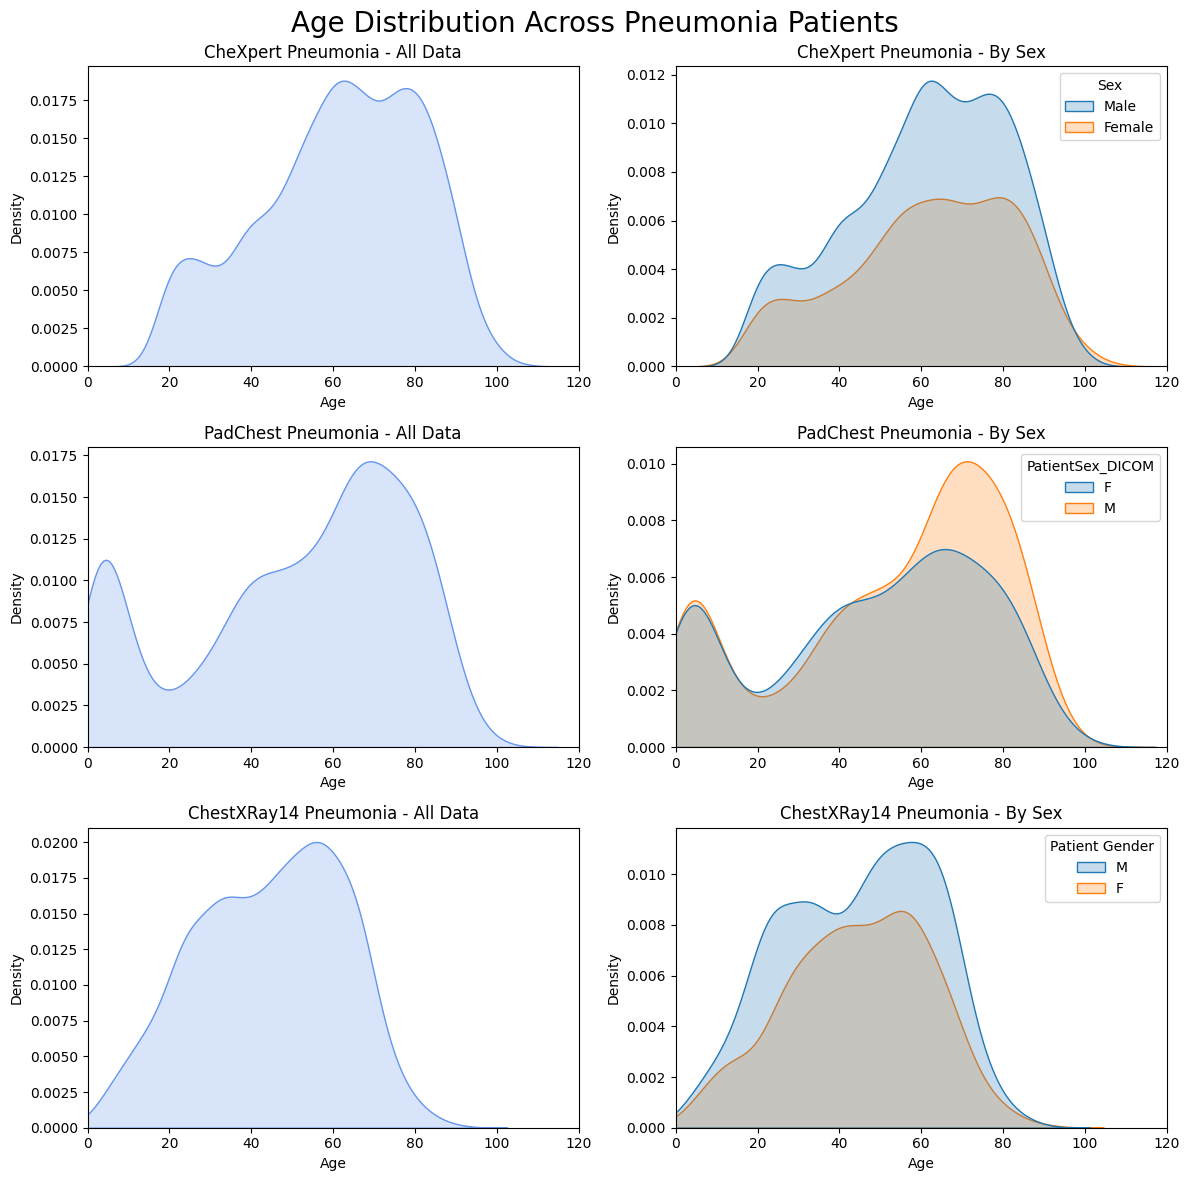

In [65]:
age_color = 'cornflowerblue'
age_min = 0
age_max = 120

plt.figure(figsize=(12,12))
plt.suptitle('Age Distribution Across Pneumonia Patients',fontsize=20)

# CheXpert
plt.subplot(3,2,1)
sns.kdeplot(chexpert_pneu, x='Age', fill=True, color=age_color)
plt.title('CheXpert Pneumonia - All Data')
plt.xlim(age_min,age_max)

plt.subplot(3,2,2)
sns.kdeplot(chexpert_pneu[chexpert_pneu['Sex'] != 'Unknown'], x='Age', hue='Sex', fill=True)
plt.title('CheXpert Pneumonia - By Sex')
plt.xlim(age_min,age_max)

# PadChest
plt.subplot(3,2,3)
sns.kdeplot(padchest_pneu, x='Age', fill=True, color=age_color)
plt.title('PadChest Pneumonia - All Data')
plt.xlim(age_min,age_max)

plt.subplot(3,2,4)
sns.kdeplot(padchest_pneu[padchest_pneu['PatientSex_DICOM'] != 'O'], x='Age', hue='PatientSex_DICOM', fill=True)
plt.title('PadChest Pneumonia - By Sex')
plt.xlim(age_min,age_max)

# ChestXRay14
plt.subplot(3,2,5)
sns.kdeplot(nih_pneu[nih_pneu['Age'] < 120], x='Age', fill=True, color=age_color)
plt.title('ChestXRay14 Pneumonia - All Data')
plt.xlim(age_min,age_max)

plt.subplot(3,2,6)
sns.kdeplot(nih_pneu[nih_pneu['Age'] < 120], x='Age', hue='Patient Gender', fill=True)
plt.title('ChestXRay14 Pneumonia - By Sex')
plt.xlim(age_min,age_max)

plt.tight_layout()


plt.show()


In [66]:
padchest_demo = padchest[padchest['PatientSex_DICOM'] != 'O'][['Age','PatientSex_DICOM']]
padchest_demo.columns = ['Age','Sex']
padchest_demo['Dataset'] = 'Padchest'

In [67]:
chexpert_demo = chexpert[chexpert['Sex'] != 'Unknown'][['Age','Sex']]
chexpert_demo['Sex'] = chexpert_demo['Sex'].map({'Female':'F','Male' : 'M'})
chexpert_demo['Dataset'] = 'CheXpert'

In [68]:
nih_demo = nih[nih['Age'] < 120][['Age','Patient Gender']]
nih_demo.columns = ['Age','Sex']
nih_demo['Dataset'] = 'ChestXRay14'

In [69]:
combine = pd.concat([padchest_demo,chexpert_demo,nih_demo])

In [70]:
combine = combine.reset_index(drop=True)

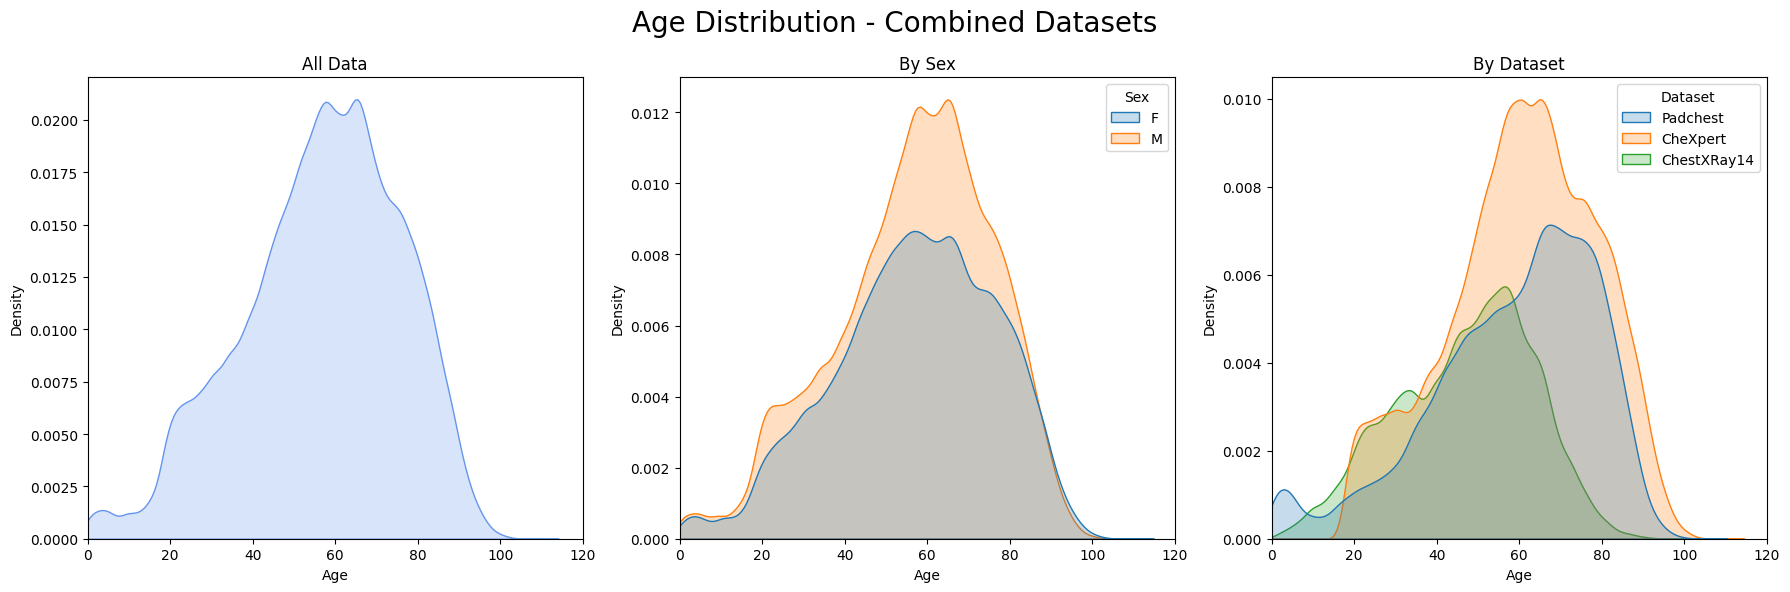

In [71]:
age_min = 0
age_max = 120

plt.figure(figsize=(18,6))
plt.suptitle('Age Distribution - Combined Datasets',fontsize=20)


plt.subplot(1,3,1)
sns.kdeplot(combine, x='Age', fill=True, color=age_color)
plt.title('All Data')
plt.xlim(age_min,age_max)

plt.subplot(1,3,2)
sns.kdeplot(combine, x='Age', hue='Sex', fill=True)
plt.title('By Sex')
plt.xlim(age_min,age_max)

plt.subplot(1,3,3)
sns.kdeplot(combine, x='Age', hue='Dataset', fill=True)
plt.title('By Dataset')
plt.xlim(age_min,age_max)


plt.tight_layout()


plt.show()

In [72]:
padchest_pneu_demo = padchest_pneu[padchest_pneu['PatientSex_DICOM'] != 'O'][['Age','PatientSex_DICOM']]
padchest_pneu_demo.columns = ['Age','Sex']
padchest_pneu_demo['Dataset'] = 'Padchest'

chexpert_pneu_demo = chexpert_pneu[chexpert_pneu['Sex'] != 'Unknown'][['Age','Sex']]
chexpert_pneu_demo['Sex'] = chexpert_pneu_demo['Sex'].map({'Female':'F','Male' : 'M'})
chexpert_pneu_demo['Dataset'] = 'CheXpert'

nih_pneu_demo = nih_pneu[nih_pneu['Age'] < 120][['Age','Patient Gender']]
nih_pneu_demo.columns = ['Age','Sex']
nih_pneu_demo['Dataset'] = 'ChestXRay14'

In [73]:
combine_pneu = pd.concat([padchest_pneu_demo,chexpert_pneu_demo,nih_pneu_demo])

In [74]:
combine_pneu

,Age,Sex,Dataset
42,22.0,F,Padchest
48,58.0,F,Padchest
73,55.0,M,Padchest
74,55.0,M,Padchest
101,66.0,F,Padchest
...,...,...,...
111557,56.0,F,ChestXRay14
111627,29.0,F,ChestXRay14
111767,22.0,F,ChestXRay14
111845,48.0,M,ChestXRay14


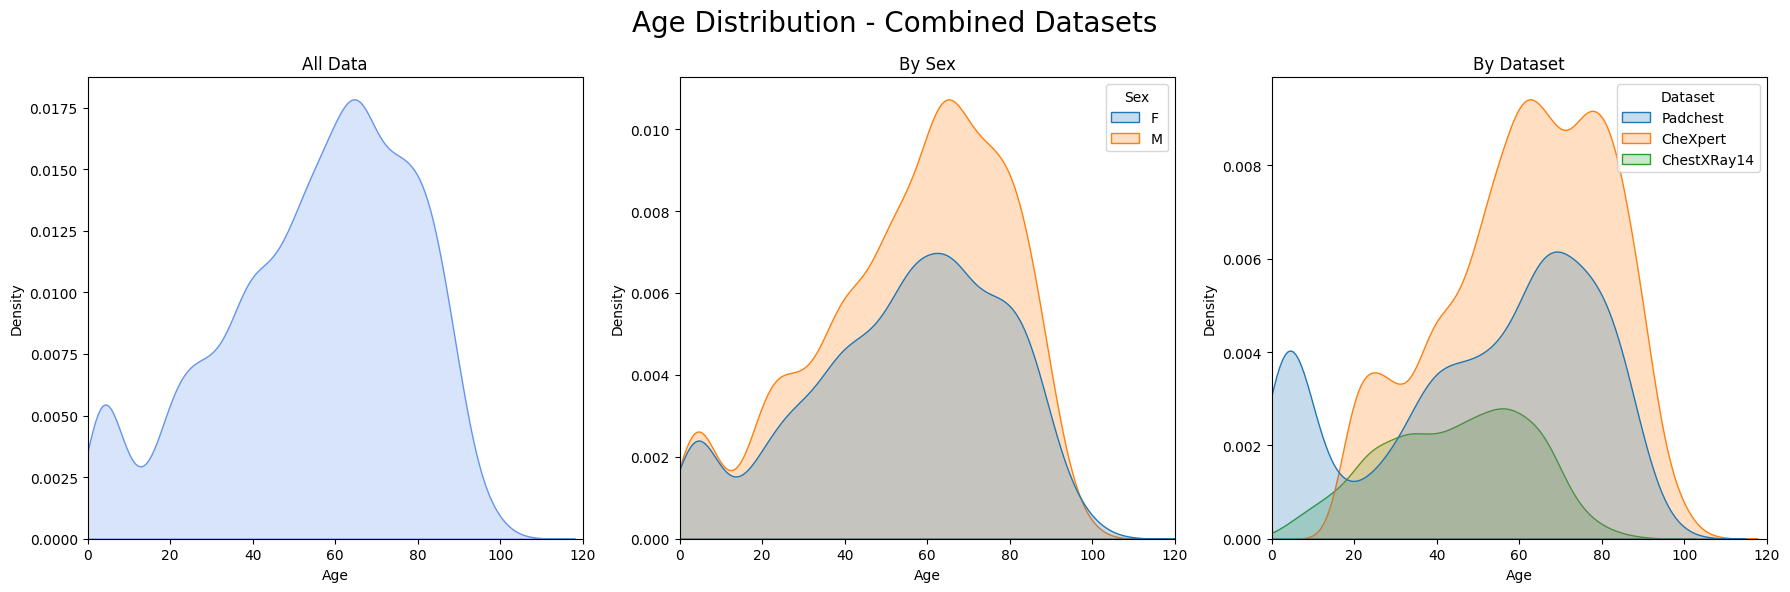

In [75]:
age_min = 0
age_max = 120

plt.figure(figsize=(18,6))
plt.suptitle('Age Distribution - Combined Datasets',fontsize=20)


plt.subplot(1,3,1)
sns.kdeplot(combine_pneu, x='Age', fill=True, color=age_color)
plt.title('All Data')
plt.xlim(age_min,age_max)

plt.subplot(1,3,2)
sns.kdeplot(combine_pneu, x='Age', hue='Sex', fill=True)
plt.title('By Sex')
plt.xlim(age_min,age_max)

plt.subplot(1,3,3)
sns.kdeplot(combine_pneu, x='Age', hue='Dataset', fill=True)
plt.title('By Dataset')
plt.xlim(age_min,age_max)


plt.tight_layout()


plt.show()